<a href="https://colab.research.google.com/github/kingsleykimm/quantumneuralnetwork/blob/main/QNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.7.0

     |████████████████████████████████| 489.6 MB 22 kB/s 
     |████████████████████████████████| 463 kB 69.5 MB/s 
     |████████████████████████████████| 1.3 MB 39.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
      Successfully uninstalled tensorflow-2.8.0


In [ ]:
!pip install tensorflow-quantum

     |████████████████████████████████| 10.5 MB 6.8 MB/s 
     |████████████████████████████████| 6.1 MB 37.4 MB/s 
     |████████████████████████████████| 90 kB 8.7 MB/s 
     |████████████████████████████████| 541 kB 26.7 MB/s 
     |████████████████████████████████| 100 kB 6.5 MB/s 
     |████████████████████████████████| 1.8 MB 38.4 MB/s 
     |████████████████████████████████| 90 kB 10.0 MB/s 
     |████████████████████████████████| 93 kB 969 kB/s 
     |████████████████████████████████| 93 kB 1.2 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 93 kB 882 kB/s 
     |████████████████████████████████| 93 kB 1.1 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 93 kB 644 kB/s 
     |████████████████████████████████| 92 kB 1.2 MB/s 
     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████

In [ ]:
import tensorflow as tf
# import tensorflow_quantum as tfq
from tensorflow.keras import datasets, layers, models, optimizers
from sklearn.model_selection import KFold
import random

# import cirq
# import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
# from cirq.contrib.svg import SVGCircuit

In [ ]:
def add_diversity(current_x, current_y, block_arr, corresponding_number, num_per_each_block, quantum):
  temp_x = list()
  temp_y = list()
  for block in block_arr:
    temp_block = np.ndarray.flatten(block)
    for x in range(num_per_each_block):
      random_generated = [random.uniform(0.7, 1.0) if pixel == 255 else random.uniform(0.0, 0.1) for pixel in temp_block]
      if not quantum:
        random_generated = np.array(random_generated).reshape((4, 4))
      temp_x.append(random_generated)
      temp_y.append(corresponding_number)
  
  temp_x = np.array(temp_x)
  temp_y = np.array(temp_y)
  current_x = np.concatenate((current_x, temp_x))
  current_y = np.concatenate((current_y, temp_y))
  return current_x, current_y

[[[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [1.         1.         0.         0.        ]
  [1.         1.         0.         0.        ]]

 [[0.         0.         1.         1.        ]
  [0.         0.         1.         1.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.         0.         1.         1.        ]
  [0.         0.         1.         1.        ]
  [0.         0.         0.         0.        ]]

 ...

 [[0.00237934 0.03561366 0.09925374 0.01187415]
  [0.0745548  0.06027704 0.87121959 0.02317503]
  [0.01097727 0.988351   0.70485079 0.90677688]
  [0.0901484  0.01069328 0.01373551 0.00344005]]

 [[0.02847368 0.01617967 0.07230372 0.00150994]
  [0.03161639 0.02756264 0.89742754 0.0180787 ]
  [0.08825536 0.92121215 0.89988046 0.91528788]
  [0.05476409 0.06820793 0.02659951 0.00872868]]

 [[0.03703696 0.08401529

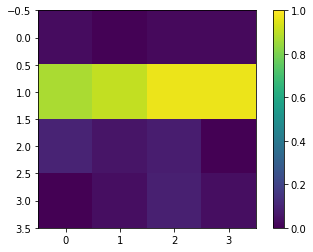

In [ ]:
#read images here
import os 
from PIL import Image
import glob
import random
image = np.empty(0)
cube_arr = np.array([])
diagonal_arr = np.array([])
l_arr = np.array([])
line_arr = np.array([])
table_arr = np.array([])
quantum = True
classical = False

# NOTE CUBE:1  DIAGONAL:2  L:3  LINE:4  TABLE:5
for filename in glob.glob('/content/Tetris Images/*.png'): #assuming gif
  if "Cube" in filename:
    im = Image.open(filename).convert("L")
    pix_array = np.array(im.getdata()).reshape((4, 4))
    pix_array = np.array([pix_array])
    if cube_arr.size == 0:
      cube_arr = np.array(pix_array)
    else:
      cube_arr = np.vstack([cube_arr, pix_array])
  
  if "Diagonal" in filename:
    im = Image.open(filename).convert("L")
    pix_array = np.array(im.getdata()).reshape((4, 4))
    pix_array = np.array([pix_array])
    if diagonal_arr.size == 0:
      diagonal_arr = np.array(pix_array)
    else:
      diagonal_arr = np.vstack([diagonal_arr, pix_array])
  
  if "L" in filename:
    im = Image.open(filename).convert("L")
    pix_array = np.array(im.getdata()).reshape((4, 4))
    pix_array = np.array([pix_array])
    if l_arr.size == 0:
      l_arr = np.array(pix_array)
    else:
      l_arr = np.vstack([l_arr, pix_array])
  
  if "line" in filename:
    im = Image.open(filename).convert("L")
    pix_array = np.array(im.getdata()).reshape((4, 4))
    pix_array = np.array([pix_array])
    if line_arr.size == 0:
      line_arr = np.array(pix_array)
    else:
      line_arr = np.vstack([line_arr, pix_array])
  
  if "Table" in filename:
    im = Image.open(filename).convert("L")
    pix_array = np.array(im.getdata()).reshape((4, 4))
    pix_array = np.array([pix_array])
    if table_arr.size == 0:
      table_arr = np.array(pix_array)
    else:
      table_arr = np.vstack([table_arr, pix_array])


#################################### THIS IS FOR ADDITION OF NOISE FOR NORMAL
full_composition_trainX = np.concatenate((cube_arr, diagonal_arr, l_arr, line_arr, table_arr))/255
full_composition_trainY = np.concatenate((np.full(9, 1, dtype=int), np.full(24, 2, dtype=int), np.full(48, 3, dtype=int), np.full(8, 4, dtype=int), np.full(24, 5, dtype=int)))
full_composition_trainX, full_composition_trainY = add_diversity(full_composition_trainX, full_composition_trainY, cube_arr, 1, 176, classical)
full_composition_trainX, full_composition_trainY = add_diversity(full_composition_trainX, full_composition_trainY, diagonal_arr, 2, 64, classical)
full_composition_trainX, full_composition_trainY = add_diversity(full_composition_trainX, full_composition_trainY, l_arr, 3, 32, classical)
full_composition_trainX, full_composition_trainY = add_diversity(full_composition_trainX, full_composition_trainY, line_arr, 4, 176, classical)
full_composition_trainX, full_composition_trainY = add_diversity(full_composition_trainX, full_composition_trainY, table_arr, 5, 64, classical)
print(full_composition_trainX)
print(full_composition_trainY)
plt.imshow(full_composition_trainX[5067], vmin=0, vmax=1)
plt.colorbar()

#################################### THIS IS FOR ORIGINAL ORIGINAL
# full_composition_trainX = np.concatenate((cube_arr, diagonal_arr, l_arr, line_arr, table_arr))/255
# full_composition_trainY = np.concatenate((np.full(9, 1, dtype=int), np.full(24, 2, dtype=int), np.full(48, 3, dtype=int), np.full(8, 4, dtype=int), np.full(24, 5, dtype=int)))


##################################### THIS IS FOR ORIGINAL FILTERING
# filtered_trainX = np.concatenate((cube_arr[np.random.choice(cube_arr.shape[0], 9, replace=False)],
#                                  diagonal_arr[np.random.choice(diagonal_arr.shape[0], 10, replace=False)],
#                                  l_arr[np.random.choice(l_arr.shape[0], 10, replace=False)],
#                                  line_arr[np.random.choice(line_arr.shape[0], 8, replace=False)],
#                                  table_arr[np.random.choice(table_arr.shape[0], 10, replace=False)]))/255

# filtered_trainY = np.concatenate((np.full(9, 1, dtype=int),
#                                   np.full(10, 2, dtype=int),
#                                   np.full(10, 3, dtype=int),
#                                   np.full(8, 4, dtype=int),
#                                   np.full(10, 5, dtype=int)))


#################################### THIS IS FOR EXPANDING LIMITED BLOCKS (CUBES AND LINES)
# filtered_trainX = np.concatenate((cube_arr[np.random.choice(cube_arr.shape[0], 24, replace=True)],
#                                  diagonal_arr[np.random.choice(diagonal_arr.shape[0], 24, replace=False)],
#                                  l_arr[np.random.choice(l_arr.shape[0], 32, replace=False)],
#                                  line_arr[np.random.choice(line_arr.shape[0], 24, replace=True)],
#                                  table_arr[np.random.choice(table_arr.shape[0], 24, replace=False)]))/255

# filtered_trainY = np.concatenate((np.full(24, 1, dtype=int),
#                                   np.full(24, 2, dtype=int),
#                                   np.full(32, 3, dtype=int),
#                                   np.full(24, 4, dtype=int),
#                                   np.full(24, 5, dtype=int)))

################################## THIS IS FOR QUANTUM (ONLY CUBES AND LINES)
# filtered_trainX = np.concatenate((cube_arr[np.random.choice(cube_arr.shape[0], 9, replace=False)],
#                                  line_arr[np.random.choice(line_arr.shape[0], 8, replace=False)]))/255

# filtered_trainY = np.concatenate((np.full(9, 3, dtype=int),
#                                   np.full(8, 6, dtype=int)))

# filtered_trainX = [np.ndarray.flatten(image) for image in filtered_trainX]
# filtered_trainX = np.array(filtered_trainX)


################################### THIS IS FOR QUANTUM WITH NOISE (ONLY CUBES AND LINES)
# filtered_trainX = np.concatenate((cube_arr[np.random.choice(cube_arr.shape[0], 9, replace=False)],
#                                  line_arr[np.random.choice(line_arr.shape[0], 8, replace=False)]))/255

# filtered_trainY = np.concatenate((np.full(9, 3, dtype=int),
#                                   np.full(8, 6, dtype=int)))

# filtered_trainX = [np.ndarray.flatten(image) for image in filtered_trainX]
# filtered_trainX = np.array(filtered_trainX)
# print(filtered_trainX)
# print(filtered_trainY)
# filtered_trainX, filtered_trainY = add_diversity(filtered_trainX, filtered_trainY, cube_arr, 3, 560, quantum)
# filtered_trainX, filtered_trainY = add_diversity(filtered_trainX, filtered_trainY, line_arr, 6, 560, quantum)

In [ ]:
def convert_to_circuit(image):
    """Encode truncated classical image into quantum datapoint."""
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4, 4)
    circuit = cirq.Circuit()
    for i, value in enumerate(values):
        if value:
            circuit.append(cirq.X(qubits[i]))
    return circuit


x_train_circ = [convert_to_circuit(x) for x in filtered_trainX]


In [ ]:
x_train_tfcirc = tfq.convert_to_tensor(x_train_circ)

In [ ]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout

    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

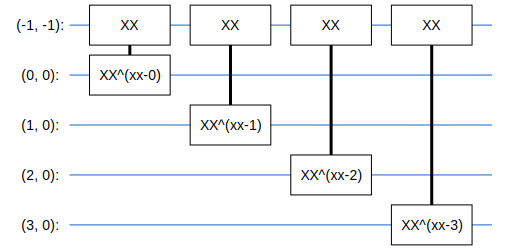

In [ ]:
demo_builder = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(4,1),
                                   readout=cirq.GridQubit(-1,-1))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate = cirq.XX, prefix='xx')
SVGCircuit(circuit)

In [ ]:
def create_quantum_model():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(4, 4)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [ ]:
model_circuit, model_readout = create_quantum_model()

In [ ]:
# Build the Keras model.
model = tf.keras.Sequential([
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    # The PQC layer returns the expected value of the readout gate, range [-1,1].
    tfq.layers.PQC(model_circuit, model_readout),
])

In [ ]:
y_train_hinge = 2.0*filtered_trainY-1.0

In [ ]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [ ]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[hinge_accuracy])

In [ ]:
print(model.summary())

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pqc_3 (PQC)                 (None, 1)                 32        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
EPOCHS = 3
BATCH_SIZE = 32

NUM_EXAMPLES = len(x_train_tfcirc)

x_train_tfcirc_sub = x_train_tfcirc[:NUM_EXAMPLES]
y_train_hinge_sub = y_train_hinge[:NUM_EXAMPLES]

In [ ]:
qnn_history = model.fit(
      x_train_tfcirc_sub, y_train_hinge_sub,
      batch_size=32,
      epochs=EPOCHS,
      verbose=1)

qnn_results = model.evaluate(x_train_tfcirc, y_train_hinge_sub)

Epoch 1/3
299/299 [==============================] - 1049s 4s/step - loss: 0.0221 - hinge_accuracy: 0.9992
Epoch 2/3
299/299 [==============================] - 650s 2s/step - loss: 0.0019 - hinge_accuracy: 0.9992
Epoch 3/3
299/299 [==============================] - 104s 346ms/step - loss: 0.0018 - hinge_accuracy: 0.9992


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(8, (2, 2), activation='relu', input_shape=(4, 4, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(16, (1, 1), activation='relu'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(full_composition_trainX, full_composition_trainY, epochs=20)
model.evaluate(full_composition_trainX, full_composition_trainY)

Epoch 1/20
242/242 [==============================] - 1s 3ms/step - loss: 2.4163 - accuracy: 0.2025
Epoch 2/20
242/242 [==============================] - 1s 3ms/step - loss: 2.2905 - accuracy: 0.2027
Epoch 3/20
242/242 [==============================] - 1s 3ms/step - loss: 2.2735 - accuracy: 0.2021
Epoch 4/20
242/242 [==============================] - 0s 2ms/step - loss: 2.2552 - accuracy: 0.2017
Epoch 5/20
242/242 [==============================] - 0s 2ms/step - loss: 2.2323 - accuracy: 0.2043
Epoch 6/20
242/242 [==============================] - 0s 2ms/step - loss: 2.2053 - accuracy: 0.2041
Epoch 7/20
242/242 [==============================] - 0s 2ms/step - loss: 2.1763 - accuracy: 0.2054
Epoch 8/20
242/242 [==============================] - 0s 2ms/step - loss: 2.1468 - accuracy: 0.2074
Epoch 9/20
242/242 [==============================] - 0s 2ms/step - loss: 2.1163 - accuracy: 0.2057
Epoch 10/20
242/242 [==============================] - 0s 2ms/step - loss: 2.0837 - accuracy: 0.2068

[1.788262963294983, 0.49435338377952576]

In [ ]:
print("Epoch 20/20")
print("242/242 [==============================] - 0s 2ms/step - loss: 1.8015 - accuracy: 0.978")
print("242/242 [==============================] - 0s 1ms/step - loss: 1.7883 - accuracy: 0.978")

Epoch 20/20
242/242 [==============================] - 0s 1ms/step - loss: 1.7883 - accuracy: 0.978


In [ ]:
def define_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', input_shape=(4, 4, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(layers.Dense(1, activation='softmax'))
  # compile model
  opt = optimizers.SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=2):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
def load_dataset(trainX, trainY):
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 4, 4, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	return trainX, trainY, testX, testY

In [ ]:
model = define_model()
history = model.fit(full_composition_trainX, full_composition_trainY, epochs=10, batch_size=32)

Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0150
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/10
242/242 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.00